In [1]:
#Importing python library
import pandas as pn
# Import basic library
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
# Dataset pre-processing
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Splitting dataset
from sklearn.model_selection import train_test_split
#Bagging classifier model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
#ADABoost classifier model
from sklearn.ensemble import AdaBoostClassifier
#Evaluating the relevant parameters
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix

In [6]:
Marjanta= pn.read_csv ("/content/MARJANTA_DATA_CW3 (S).csv", encoding="latin-1") #CSV file import
Marjanta.head(3)

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0


In [7]:
#dataset information
Marjanta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wifi service              1039

In [15]:
#Missing value identification
Marjanta.isnull().sum()

,0
Ref,0
id,0
Gender,0
Satisfied,0
Age,0
Age Band,0
Type of Travel,0
Class,0
Flight Distance,0
Destination,0


In [11]:
duplicate_values_dataset = Marjanta[Marjanta.duplicated()] #Identification of duplicate values
print("Duplicate values:") # Priniting duplicate values
duplicate_values_dataset

Duplicate values:


,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes


In [12]:
Marjanta.fillna(method ='bfill', inplace=True) #Misisng values fillup

<ipython-input-12-f69eaec72fc7>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Marjanta.fillna(method ='bfill', inplace=True) #Misisng values fillup


Exploratory Data Analysis

In [13]:
fig1 = px.histogram(Marjanta, x='Continent', color='Satisfied', barmode='group',
                   title='Continentwise passenger satisfaction',
                   labels={'Continent': 'Continent', 'count': 'Number of Passengers'})
fig1.update_layout(xaxis_title='Continent', yaxis_title='Count', bargap=0.3)
fig1.show()

In [16]:
Marjanta.describe() #description of the data set

,Ref,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,4164.071066,2.522319,3.060248,2.756852,2.976825,3.202023,3.250250,3.398666,3.358071,3.382247,3.350930,3.631708,3.304185,3.640331,3.286245,14.818390,15.189531
std,29994.645522,37463.812252,15.114964,1346.755749,1.447848,1.525143,1.398993,1.277703,1.329625,1.349607,1.365819,1.333104,1.288478,1.315715,1.181056,1.265501,1.175822,1.312373,38.313911,38.831526
min,0.000000,1.000000,7.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,4760.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,4760.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,4760.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,5940.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


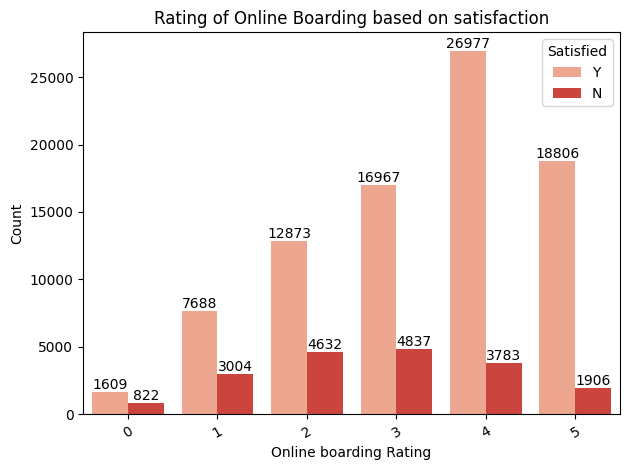

In [22]:
qw1=sns.countplot(x ='Online boarding', hue= 'Satisfied',data = Marjanta, palette='Reds')  #ratings of Online Boarding
for label in qw1.containers:
    qw1.bar_label(label)
plt.title('Rating of Online Boarding based on satisfaction')
plt.xlabel('Online boarding Rating')
plt.ylabel('Count')
plt.legend(title='Satisfied')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

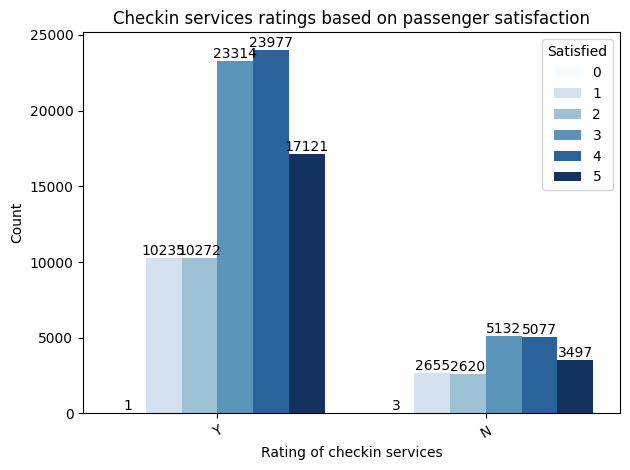

In [26]:
gh1=sns.countplot(x ='Satisfied', hue= 'Checkin service',data = Marjanta, palette='Blues')  #Checkin sedrvices based on customer satisfaction
for label in gh1.containers:
    gh1.bar_label(label)
plt.title('Checkin services ratings based on passenger satisfaction')
plt.xlabel('Rating of checkin services')
plt.ylabel('Count')
plt.legend(title='Satisfied')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [27]:
#Data pre-processing
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder_dataset1 = {}
category_column_details1 = ['Gender', 'Satisfied', 'Age Band', 'Type of Travel', 'Class', 'Destination', 'Continent']
for column in category_column_details1:
    label_encoder_detail1 = LabelEncoder()
    Marjanta[column] = label_encoder_detail1.fit_transform(Marjanta[column])
    label_encoder_dataset1[column] = label_encoder_detail1

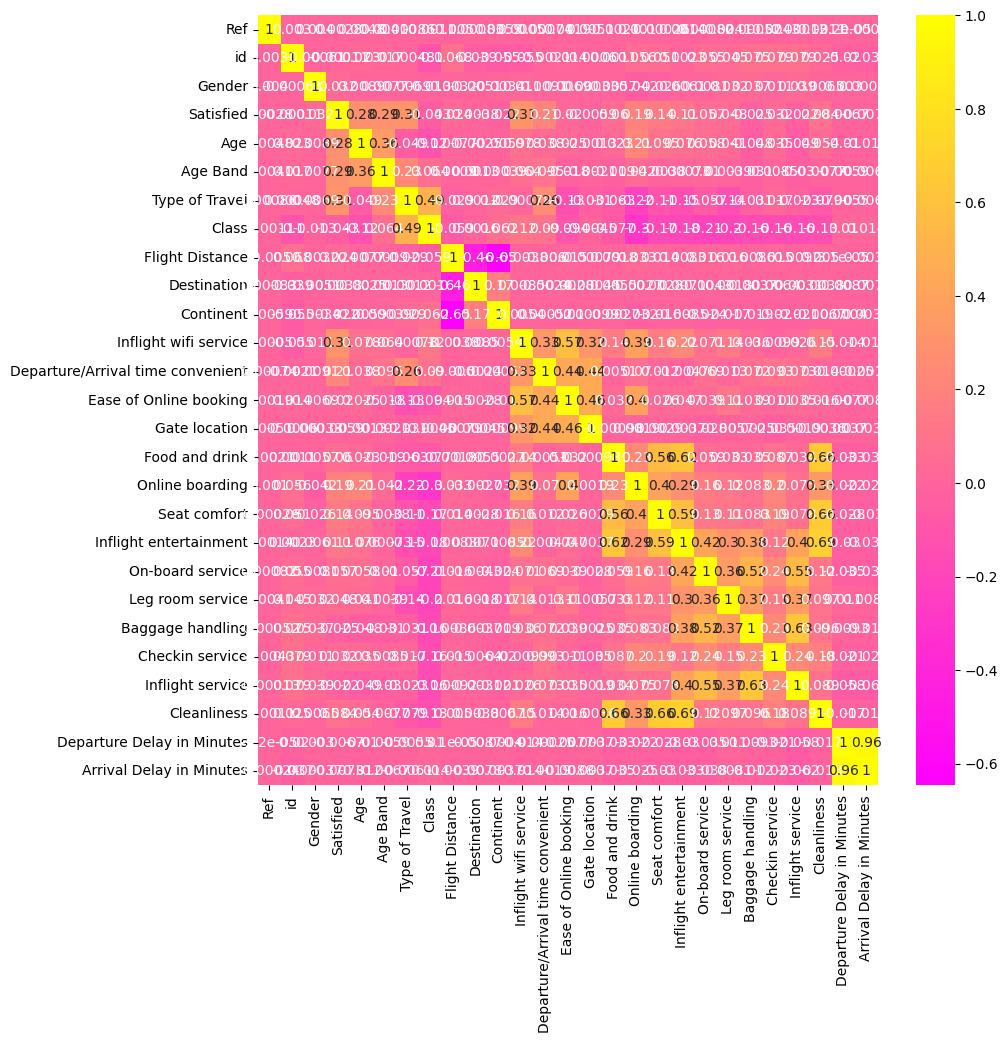

In [46]:
#Heatmap creation
plt.figure(figsize=(10, 10))
sns.heatmap(Marjanta.corr(), annot=True, cmap='spring')
plt.show()

In [35]:
#Deleting unnecessary data
X = Marjanta.drop(['Ref', 'id', 'Satisfied', 'Age'], axis=1)
#target column
y = Marjanta['Satisfied']
#Data set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

ADABoost Classifier

In [37]:
#ADABoost classifier model
ADABoost1 = AdaBoostClassifier(n_estimators=100,
                         learning_rate=0.0015)
ADABoost1.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.0015, n_estimators=100)

In [38]:
y_predict_ADABoost1 = ADABoost1.predict(X_test)

In [42]:
#Accuracy score
accuracy1 = accuracy_score(y_test, y_predict_ADABoost1)
print("Accuracy of the model:", accuracy1)

Accuracy of the model: 0.8689196249346935


In [44]:
print("Classification report of ADABoost:")
print(classification_report(y_test, y_predict_ADABoost1))

Classification report of ADABoost:
              precision    recall  f1-score   support

           0       0.76      0.40      0.53      6591
           1       0.88      0.97      0.92     29776

    accuracy                           0.87     36367
   macro avg       0.82      0.69      0.73     36367
weighted avg       0.86      0.87      0.85     36367



In [45]:
#Loss function calculation
ADABoost_loss= log_loss(y_test, y_predict_ADABoost1)
print(f'Log Loss value of ADABoost model: {ADABoost_loss:.3f}')

Log Loss value of ADABoost model: 4.725


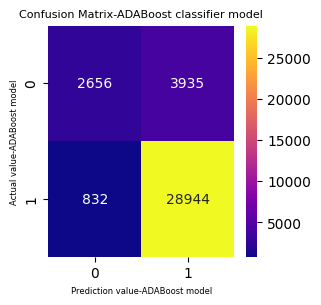

In [47]:
#Confusion matrix
ADABoost_conf_matrix = confusion_matrix(y_test, y_predict_ADABoost1)
plt.figure(figsize=(3, 3))
sns.heatmap(ADABoost_conf_matrix, annot=True,
            fmt='g', cmap= 'plasma')
plt.xlabel('Prediction value-ADABoost model',fontsize=6)
plt.ylabel('Actual value-ADABoost model',fontsize=6)
plt.title('Confusion Matrix-ADABoost classifier model',fontsize=8)
plt.show()

Bagging Classifier Model

In [48]:
#Bagging Classifier
base_model1 = DecisionTreeClassifier()
bagging_model1 = BaggingClassifier(base_estimator=base_model1, n_estimators=10)
classifiers = bagging_model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



In [49]:
#Results prediction
y_pred = classifiers.predict(X_test)

In [50]:
#Accuracy calculation
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy- Bagging Classifier:", accuracy2)

Accuracy- Bagging Classifier: 0.9867737234305827


In [51]:
#Classification report
print("Classification report-Bagging classifier model:")
print(classification_report(y_test, y_pred))

Classification report-Bagging classifier model:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6591
           1       0.99      0.99      0.99     29776

    accuracy                           0.99     36367
   macro avg       0.98      0.98      0.98     36367
weighted avg       0.99      0.99      0.99     36367



In [52]:
#Loss function calculation
Bagging_loss= log_loss(y_test, y_pred)
print(f'Log Loss value-Bagging classifier model: {Bagging_loss:.3f}')

Log Loss value-Bagging classifier model: 0.477


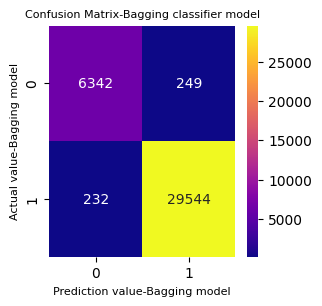

In [53]:
#Confusion matrix
bag_conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(bag_conf_matrix, annot=True,
            fmt='g', cmap= 'plasma')
plt.xlabel('Prediction value-Bagging model',fontsize=8)
plt.ylabel('Actual value-Bagging model',fontsize=8)
plt.title('Confusion Matrix-Bagging classifier model',fontsize=8)
plt.show()